# Example: Static inverse free-boundary equilibrium calculations (in ITER)

---

Here we will generate an equilibrium (find coil currents with the inverse solver) in an ITER-like tokamak. 

The machine description comes from files located [here](https://github.com/ProjectTorreyPines/FUSE.jl).

The equilbirium\profile parameters are **completely made up** - please experiment on your own and change them to more realistic values as you please!

### Import packages

In [1]:
import os
import matplotlib.pyplot as plt
import freegs4e
import numpy as np

### Create the machine object

In [2]:
# set paths
os.environ["ACTIVE_COILS_PATH"] = f"../machine_configs/ITER/ITER_active_coils.pickle"
os.environ["PASSIVE_COILS_PATH"] = f"../machine_configs/ITER/ITER_passive_coils.pickle"
os.environ["WALL_PATH"] = f"../machine_configs/ITER/ITER_wall.pickle"
os.environ["LIMITER_PATH"] = f"../machine_configs/ITER/ITER_limiter.pickle"

In [3]:
# Now the machine can actually be built:
from freegsnke import build_machine
tokamak = build_machine.tokamak()

No coil named Solenoid among the active coils.
No probe configuration is provided


Text(60.291666666666664, 0.5, 'Height, $Z$ [m]')

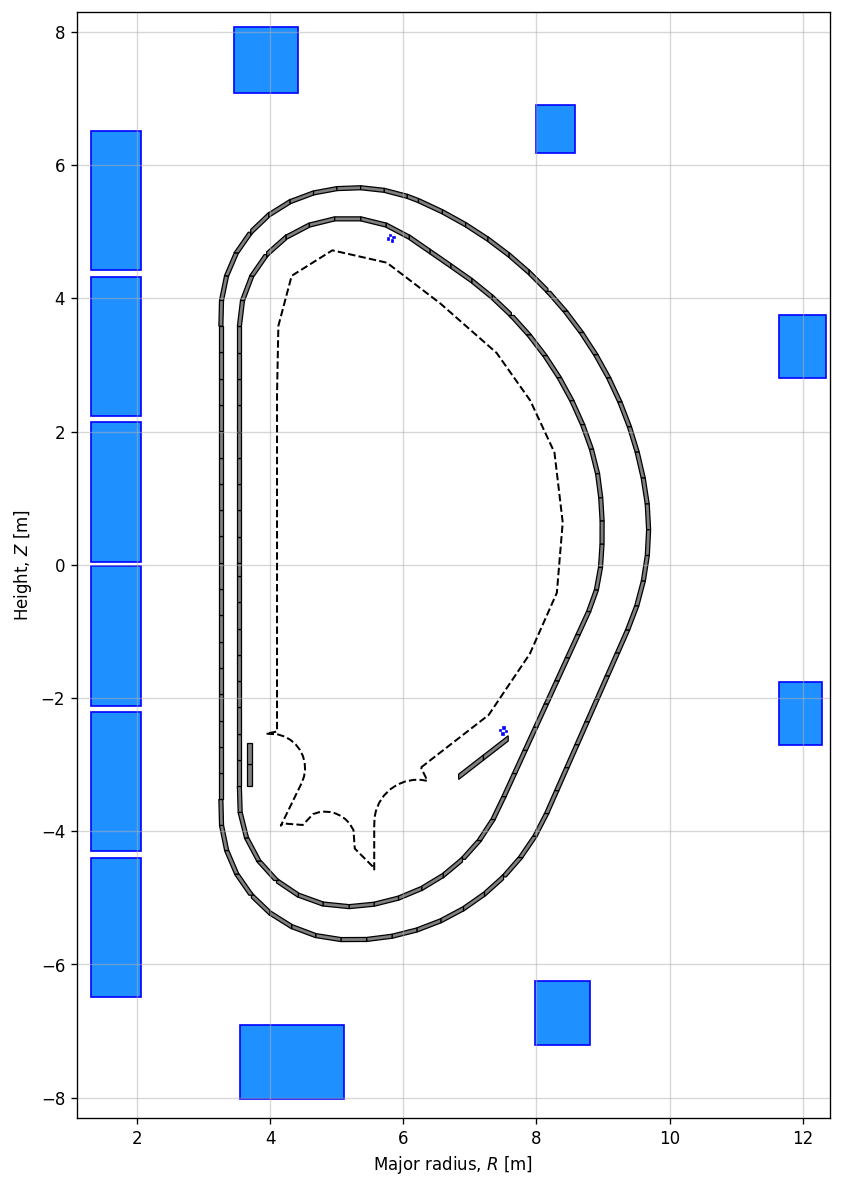

In [4]:
# plot the machine
fig1, ax1 = plt.subplots(1, 1, figsize=(7, 15), dpi=120)
plt.tight_layout()

tokamak.plot(axis=ax1, show=False)
ax1.plot(tokamak.limiter.R, tokamak.limiter.Z, color='k', linewidth=1.2, linestyle="--")
# ax1.plot(tokamak.wall.R, tokamak.wall.Z, color='k', linewidth=1.2, linestyle="-")

ax1.grid(alpha=0.5)
ax1.set_aspect('equal')
ax1.set_xlim(1.1, 12.4)
ax1.set_ylim(-8.3, 8.3)
ax1.set_xlabel(r'Major radius, $R$ [m]')
ax1.set_ylabel(r'Height, $Z$ [m]')

### Instantiate an equilibrium

In [5]:
from freegsnke import equilibrium_update

eq = equilibrium_update.Equilibrium(
    tokamak=tokamak,       # provide tokamak object
    Rmin=3.2, Rmax=8.8,   # radial range
    Zmin=-5, Zmax=5,   # vertical range
    nx=129,                # number of grid points in the radial direction (needs to be of the form (2**n + 1) with n being an integer)
    ny=129,                # number of grid points in the vertical direction (needs to be of the form (2**n + 1) with n being an integer)
    # psi=plasma_psi
)

### Instantiate a profile object

In [6]:
# initialise the profiles
from freegsnke.jtor_update import ConstrainBetapIp
profiles = ConstrainBetapIp(
    eq=eq,        # equilibrium object
    betap=0.15,   # poloidal beta
    Ip=11e6,      # plasma current
    fvac=0.5,     # fvac = rB_{tor}
    alpha_m=2.0,  # profile function parameter
    alpha_n=1.0   # profile function parameter
)

### Load the static nonlinear solver

In [7]:
from freegsnke import GSstaticsolver
GSStaticSolver = GSstaticsolver.NKGSsolver(eq)    

### Constraints

In [8]:
Rx = 5.13      # X-point radius
Zx = -3.16      # X-point height

# set desired null_points locations
# this can include X-point and O-point locations
null_points = [[Rx], [Zx]]

# set desired isoflux constraints with format 
# isoflux_set = [isoflux_0, isoflux_1 ... ] 
# with each isoflux_i = [R_coords, Z_coords]
isoflux_set = np.array([[[Rx, 4.22, 4.35, 7.26, 7.91, 8.14, 7.47, 6.05, 4.85, 4.28, 5.4, 4.3], [Zx, 0.55, -1.45, -1.94, -0.77, 0.55, 2.55, 3.74, 3.78, 2.50, -4.5, -3.9]]])
           

# instantiate the freegsnke constrain object
from freegsnke.inverse import Inverse_optimizer
constrain = Inverse_optimizer(null_points=null_points,
                              isoflux_set=isoflux_set)


# remove from the coils available for control the radial field coil 
eq.tokamak['VS3'].control = False


### The inverse solve

Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 1149479051.6477458
Control currents updated. Relative update of tokamak_psi in the core of: 1149479051.6477458
Magnetic constraint losses = 0.45236269105290183
Handing off to forward_solve. Requested tolerance: 0.001
Initial guess for plasma_psi successful, residual found.
Initial relative error =  176.28284611653632
-----
Picard iteration: 0
Update too large, resized.
...relative error =  85.07034358967594
Iteration 1 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 0.16184304332676236
Control currents updated. Relative update of tokamak_psi in the core of: 0.16184304332676236
Magnetic constraint losses = 1.0480349675021479
Handing off to forward_solve. Requested tolerance: 0.001
Initial guess for plasma_psi successful, residual found.
Initial relative error =  91.38777483736102
-----
Picard iteration: 0
Update too large, resized.
...relative error

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.001 with less than 1 iterations. Last relative psi change: 85.07034358967594.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.001 with less than 1 iterations. Last relative psi change: 40.40290736328982.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.0005583802014912058 with less than 1 iterations. Last relative psi change: 25.044384454546325.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.001 with less than 1 iterations. Last relative psi change: 17.685568127008036.
  warnings.warn(
/U

Initial guess for plasma_psi successful, residual found.
Initial relative error =  20.643465521245897
-----
Picard iteration: 0
Update too large, resized.
...relative error =  12.320473025882798
Iteration 5 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 0.3056292336696528
Control currents updated. Relative update of tokamak_psi in the core of: 0.3056292336696528
Magnetic constraint losses = 2.6541514490739777
Handing off to forward_solve. Requested tolerance: 0.001
Initial guess for plasma_psi successful, residual found.
Initial relative error =  4.6797392022659094
-----
Picard iteration: 0
Update too large, resized.
...relative error =  8.643393961766714
Iteration 6 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 0.19193639385185648
Control currents updated. Relative update of tokamak_psi in the core of: 0.19193639385185648
Magnetic constraint losses = 3.603243664247726
Handing off t

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.001 with less than 1 iterations. Last relative psi change: 8.643393961766714.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.001 with less than 1 iterations. Last relative psi change: 5.950091861448173.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.001 with less than 1 iterations. Last relative psi change: 3.9825378636282904.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.001 with less than 1 iterations. Last relative psi change: 2.6005449188389087.
  warnings.warn(
/Users/zn8047/Docu

-----
Picard iteration: 0
Update too large, resized.
...relative error =  1.593395224130476
Iteration 10 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 0.10267628072696086
Control currents updated. Relative update of tokamak_psi in the core of: 0.10267628072696086
Magnetic constraint losses = 8.810632388590246
Handing off to forward_solve. Requested tolerance: 0.001
Initial guess for plasma_psi successful, residual found.
Initial relative error =  1.628559950300402
-----
Picard iteration: 0
Update too large, resized.
...relative error =  0.8580511536622051
Iteration 11 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 0.005883598899687885
Control currents updated. Relative update of tokamak_psi in the core of: 0.005883598899687885
Magnetic constraint losses = 11.068926418324299
Handing off to forward_solve. Requested tolerance: 5.883598899687885e-05
Initial guess for plasma_psi successf

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 5.883598899687885e-05 with less than 1 iterations. Last relative psi change: 0.36875681346201405.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.001 with less than 1 iterations. Last relative psi change: 0.08754758157884758.
  warnings.warn(


-----
Newton-Krylov iteration: 0
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.11388387000265929
-----
Newton-Krylov iteration: 1
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.10308432187210713
-----
Newton-Krylov iteration: 2
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.11512571926782286
-----
Newton-Krylov iteration: 3
Update too large, resized.
Increase in residual, update reduction triggered.
...relative error =  0.11598313436560381
Discarding 'primary' Xpoint! Please check final result
Discarding 'primary' Xpoint! Please check final result
-----
Newton-Krylov iteration: 4
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.1194166247389297
-----
Newton-Krylov iteration: 5
Update too large, resized.
Increase in residual, update reduction triggered.
..

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.00017847871106771253 with less than 10.0 iterations. Last relative psi change: 0.1485384939121999.
  warnings.warn(


-----
Picard iteration: 3
Update too large, resized.
...relative error =  0.14053777876629417
-----
Newton-Krylov iteration: 4
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.13709557587866056
-----
Newton-Krylov iteration: 5
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.1568411742241752
-----
Picard iteration: 6
Update too large, resized.
...relative error =  0.1573073554154963
-----
Picard iteration: 7
Update too large, resized.
...relative error =  0.15861771660610077
-----
Picard iteration: 8
Update too large, resized.
...relative error =  0.1538389663604102
-----
Picard iteration: 9
Update too large, resized.
...relative error =  0.1302639627324604
Iteration 15 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 0.04228345986547802
Control currents updated. Relative update of tokamak_psi in the core of: 0.0410275988240

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.00017430123701561403 with less than 10.0 iterations. Last relative psi change: 0.1302639627324604.
  warnings.warn(


-----
Picard iteration: 2
Update too large, resized.
...relative error =  0.19472330942886912
-----
Picard iteration: 3
Update too large, resized.
...relative error =  0.1872454005117353
-----
Picard iteration: 4
Update too large, resized.
...relative error =  0.16970517449170966
-----
Picard iteration: 5
Update too large, resized.
...relative error =  0.15245480240143117
-----
Picard iteration: 6
Update too large, resized.
...relative error =  0.15433724017561118
-----
Picard iteration: 7
Update too large, resized.
...relative error =  0.14699289577000396
-----
Newton-Krylov iteration: 8
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.12266108784157667
-----
Newton-Krylov iteration: 9
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.09818266892935675
Iteration 16 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 0.027014573

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.0004102759882401345 with less than 10.0 iterations. Last relative psi change: 0.09818266892935675.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.00025950091994837206 with less than 10.0 iterations. Last relative psi change: 0.17255462572143626.
  warnings.warn(


Initial guess for plasma_psi successful, residual found.
Initial relative error =  0.2545629968029333
-----
Picard iteration: 0
Update too large, resized.
...relative error =  0.241130894500602
-----
Picard iteration: 1
Update too large, resized.
...relative error =  0.23137488449890495
-----
Picard iteration: 2
Update too large, resized.
...relative error =  0.22206422153123884
-----
Picard iteration: 3
Update too large, resized.
...relative error =  0.20889068601869856
-----
Picard iteration: 4
Update too large, resized.
...relative error =  0.1911697992641758
-----
Picard iteration: 5
Update too large, resized.
...relative error =  0.1718121298094803
-----
Picard iteration: 6
Update too large, resized.
...relative error =  0.15577166271557039
-----
Picard iteration: 7
Update too large, resized.
...relative error =  0.13243632632426375
-----
Newton-Krylov iteration: 8
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.12047659173

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.00048762889952254287 with less than 10.0 iterations. Last relative psi change: 0.12551934601928402.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.0002367277874917606 with less than 10.0 iterations. Last relative psi change: 0.1490641646518751.
  warnings.warn(


-----
Newton-Krylov iteration: 0
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.11843554186015294
-----
Newton-Krylov iteration: 1
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.11538449190513994
-----
Newton-Krylov iteration: 2
Update too large, resized.
...relative error =  0.12413281319485583
-----
Newton-Krylov iteration: 3
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.1255043319512565
-----
Newton-Krylov iteration: 4
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.12020967956642183
-----
Newton-Krylov iteration: 5
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.11662206788292291
-----
Newton-Krylov iteration: 6
Update too large, resized.
New starting_direction used due to collinear residuals.

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.00027137292991440424 with less than 10.0 iterations. Last relative psi change: 0.1755236307902824.
  warnings.warn(


-----
Newton-Krylov iteration: 9
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.10467959916223932
Iteration 21 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 0.027543826061320054
Control currents updated. Relative update of tokamak_psi in the core of: 0.025161760168705263
Magnetic constraint losses = 50.67001581599828
Handing off to forward_solve. Requested tolerance: 0.00025161760168705265
Initial guess for plasma_psi successful, residual found.
Initial relative error =  0.24028486973398647
-----
Picard iteration: 0
Update too large, resized.
...relative error =  0.2163863455481213
-----
Picard iteration: 1
Update too large, resized.
...relative error =  0.19307892588689915
-----
Picard iteration: 2
Update too large, resized.
...relative error =  0.18343031696086998
-----
Picard iteration: 3
Update too large, resized.
...relative error =  0.16706305763245888
-----
Picard iter

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.00014341644548321143 with less than 10.0 iterations. Last relative psi change: 0.10467959916223932.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.00025161760168705265 with less than 10.0 iterations. Last relative psi change: 0.15740877541571732.
  warnings.warn(


-----
Newton-Krylov iteration: 0
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.08945782393130287
-----
Newton-Krylov iteration: 1
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.09420313702003538
-----
Newton-Krylov iteration: 2
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.08598092505476589
-----
Newton-Krylov iteration: 3
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.0956741214131397
-----
Newton-Krylov iteration: 4
Update too large, resized.
...relative error =  0.10260463576929306
-----
Newton-Krylov iteration: 5
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.0880003131266921
-----
Newton-Krylov iteration: 6
Update too large, resized.
New starting_direction used due to collinear residuals.


/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.00024874495147237974 with less than 10.0 iterations. Last relative psi change: 0.05751240486699731.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.00024465246361796307 with less than 10.0 iterations. Last relative psi change: 0.13405529752865022.
  warnings.warn(


-----
Picard iteration: 6
Update too large, resized.
...relative error =  0.17764629621719483
-----
Picard iteration: 7
Update too large, resized.
...relative error =  0.1632803400905074
-----
Picard iteration: 8
Update too large, resized.
...relative error =  0.14984916978343693
-----
Newton-Krylov iteration: 9
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.13405529752865022
Iteration 24 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 0.02445380517466404
Control currents updated. Relative update of tokamak_psi in the core of: 0.02063108328202296
Magnetic constraint losses = 44.58534440141443
Handing off to forward_solve. Requested tolerance: 0.00020631083282022958
Initial guess for plasma_psi successful, residual found.
Initial relative error =  0.11690582924383877
-----
Newton-Krylov iteration: 0
Update too large, resized.
New starting_direction used due to collinear residual

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.00020631083282022958 with less than 10.0 iterations. Last relative psi change: 0.09026158691554727.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 4.9524311160204227e-05 with less than 10.0 iterations. Last relative psi change: 0.21232252977811392.
  warnings.warn(


-----
Newton-Krylov iteration: 0
...relative error =  0.0766876517012077
Iteration 27 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 0.004529701404042764
Control currents updated. Relative update of tokamak_psi in the core of: 0.003935159127855912
Magnetic constraint losses = 19.436288870044944
Handing off to forward_solve. Requested tolerance: 3.9351591278559124e-05
Initial guess for plasma_psi successful, residual found.
Initial relative error =  0.1778929684796195
-----
Picard iteration: 0
Update too large, resized.
...relative error =  0.16563795391451497
-----
Picard iteration: 1
...relative error =  0.16766219200202467
-----
Picard iteration: 2
...relative error =  0.16814595834728352
-----
Picard iteration: 3
Update too large, resized.
...relative error =  0.19732419770757792
-----
Picard iteration: 4
...relative error =  0.19517031009949315
-----
Picard iteration: 5
...relative error =  0.19575305406867907
-----
Picard iterati

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.001 with less than 1 iterations. Last relative psi change: 0.0766876517012077.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 3.9351591278559124e-05 with less than 10.0 iterations. Last relative psi change: 0.24365283591895218.
  warnings.warn(


-----
Newton-Krylov iteration: 0
...relative error =  0.10264628985468129
Iteration 29 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 0.006248291983939841
Control currents updated. Relative update of tokamak_psi in the core of: 0.005373895723025651
Magnetic constraint losses = 20.922224392341015
Handing off to forward_solve. Requested tolerance: 5.3738957230256505e-05
Initial guess for plasma_psi successful, residual found.
Initial relative error =  0.2197456973266548
-----
Picard iteration: 0
Update too large, resized.
...relative error =  0.20570133911530308
-----
Picard iteration: 1
...relative error =  0.22861804100314487
-----
Picard iteration: 2
...relative error =  0.2330670457862743
-----
Picard iteration: 3
Update too large, resized.
...relative error =  0.2520438829852691
-----
Picard iteration: 4
...relative error =  0.24448777459478088
-----
Picard iteration: 5
...relative error =  0.23789292665268605
-----
Picard iteratio

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.001 with less than 1 iterations. Last relative psi change: 0.10264628985468129.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 5.3738957230256505e-05 with less than 10.0 iterations. Last relative psi change: 0.20950281659606615.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.001 with less than 1 iterations. Last relative psi change: 0.2025154058975423.
  warnings.warn(


-----
Picard iteration: 0
...relative error =  0.2025154058975423
Iteration 31 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 0.9095865700435034
Control currents updated. Relative update of tokamak_psi in the core of: 0.9095865700435034
Magnetic constraint losses = 23.82887281055213
Handing off to forward_solve. Requested tolerance: 0.001
Initial guess for plasma_psi successful, residual found.
Initial relative error =  0.07123303728353002
-----
Newton-Krylov iteration: 0
...relative error =  0.03701666923747037
Iteration 32 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 0.020216753503049703
Control currents updated. Relative update of tokamak_psi in the core of: 0.017213711876481214
Magnetic constraint losses = 13.508079916448008
Handing off to forward_solve. Requested tolerance: 0.00017213711876481213
Initial guess for plasma_psi successful, residual found.
Initial relative error =

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.001 with less than 1 iterations. Last relative psi change: 0.03701666923747037.
  warnings.warn(


-----
Newton-Krylov iteration: 1
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.05124724911255289
-----
Newton-Krylov iteration: 2
Update too large, resized.
Increase in residual, update reduction triggered.
...relative error =  0.062400540759277416
-----
Newton-Krylov iteration: 3
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.05426560150384696
-----
Newton-Krylov iteration: 4
Update too large, resized.
Increase in residual, update reduction triggered.
...relative error =  0.06932604321311216
-----
Newton-Krylov iteration: 5
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.06109549323984482
-----
Newton-Krylov iteration: 6
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.06396947326978558
-----
Newton-Krylov iteration: 7
Update too large, resized.
Increase 

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.00017213711876481213 with less than 10.0 iterations. Last relative psi change: 0.07667990310317975.
  warnings.warn(


-----
Newton-Krylov iteration: 0
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.06634932867072592
-----
Newton-Krylov iteration: 1
Update too large, resized.
...relative error =  0.058479897696866796
-----
Newton-Krylov iteration: 2
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.039142683077692954
-----
Newton-Krylov iteration: 3
Update too large, resized.
Increase in residual, update reduction triggered.
...relative error =  0.04226379173047637
-----
Newton-Krylov iteration: 4
Update too large, resized.
...relative error =  0.04040642740968164
-----
Newton-Krylov iteration: 5
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.019937260978324066
-----
Newton-Krylov iteration: 6
Increase in residual, update reduction triggered.
...relative error =  0.02390728425038363
-----
Newton-Krylov iteration: 7
...relative erro

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 7.483419287636506e-05 with less than 10.0 iterations. Last relative psi change: 0.02245880184525365.
  warnings.warn(


-----
Newton-Krylov iteration: 2
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.1194891913545343
-----
Newton-Krylov iteration: 3
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.1588080797149596
-----
Picard iteration: 4
...relative error =  0.15123401057595712
-----
Picard iteration: 5
...relative error =  0.14797333589918926
Discarding 'primary' Xpoint! Please check final result
-----
Newton-Krylov iteration: 6
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.11688531542343332
-----
Newton-Krylov iteration: 7
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.09356069725205
-----
Newton-Krylov iteration: 8
Update too large, resized.
...relative error =  0.09187929673123299
-----
Newton-Krylov iteration: 9
Update too large, resized.
New starting_direction used

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.00010842671013039666 with less than 10.0 iterations. Last relative psi change: 0.06790483266690374.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.0002322883145780261 with less than 10.0 iterations. Last relative psi change: 0.24842780887678229.
  warnings.warn(


-----
Picard iteration: 8
...relative error =  0.2335498775975535
-----
Picard iteration: 9
Update too large, resized.
...relative error =  0.24842780887678229
Iteration 36 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 7.5029217091117975
Control currents updated. Relative update of tokamak_psi in the core of: 7.5029217091117975
Magnetic constraint losses = 20.104238224934907
Handing off to forward_solve. Requested tolerance: 0.001
Initial guess for plasma_psi successful, residual found.
Initial relative error =  0.19739996964159348
-----
Picard iteration: 0
...relative error =  0.21915386598538994
Iteration 37 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 0.0860894770784632
Control currents updated. Relative update of tokamak_psi in the core of: 0.0860894770784632
Magnetic constraint losses = 15.732242850202136
Handing off to forward_solve. Requested tolerance: 0.000860894770784632

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.001 with less than 1 iterations. Last relative psi change: 0.21915386598538994.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.000860894770784632 with less than 1 iterations. Last relative psi change: 0.049212096662597606.
  warnings.warn(


Initial guess for plasma_psi successful, residual found.
Initial relative error =  0.19701113664541833
-----
Picard iteration: 0
...relative error =  0.19788863276988686
-----
Picard iteration: 1
...relative error =  0.1962089216649386
-----
Picard iteration: 2
...relative error =  0.19412022139323837
-----
Picard iteration: 3
Increase in residual, update reduction triggered.
...relative error =  0.2457147143293095
-----
Picard iteration: 4
...relative error =  0.25465748871010185
-----
Picard iteration: 5
...relative error =  0.261385729743898
-----
Picard iteration: 6
Increase in residual, update reduction triggered.
...relative error =  0.3334098969161569
-----
Picard iteration: 7
...relative error =  0.3533201196284918
-----
Picard iteration: 8
...relative error =  0.3422721341566919
-----
Picard iteration: 9
...relative error =  0.3306078781685767
Iteration 39 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 0.607046514588931
Contr

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 1e-05 with less than 10.0 iterations. Last relative psi change: 0.3306078781685767.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.001 with less than 1 iterations. Last relative psi change: 0.16098277211253256.
  warnings.warn(


Initial guess for plasma_psi successful, residual found.
Initial relative error =  0.17484070687473693
-----
Picard iteration: 0
...relative error =  0.16098277211253256
Iteration 40 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 0.004368980039153144
Control currents updated. Relative update of tokamak_psi in the core of: 0.003537684893404705
Magnetic constraint losses = 13.552745242046235
Handing off to forward_solve. Requested tolerance: 3.537684893404705e-05
Initial guess for plasma_psi successful, residual found.
Initial relative error =  0.07027275984600644
-----
Newton-Krylov iteration: 0
Update too large, resized.
...relative error =  0.037199436168033104
-----
Newton-Krylov iteration: 1
Update too large, resized.
...relative error =  0.02271213355781041
-----
Newton-Krylov iteration: 2
...relative error =  0.005869124341550675
-----
Newton-Krylov iteration: 3
...relative error =  0.0012308669819850512
-----
Newton-Krylov itera

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 2.4167341308987587e-05 with less than 10.0 iterations. Last relative psi change: 0.06311927552540814.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 7.485954590947089e-05 with less than 10.0 iterations. Last relative psi change: 0.17650206015369835.
  warnings.warn(


Initial guess for plasma_psi successful, residual found.
Initial relative error =  0.17342006461485338
-----
Picard iteration: 0
Update too large, resized.
...relative error =  0.17173959896484867
-----
Picard iteration: 1
...relative error =  0.17690760324656582
-----
Picard iteration: 2
...relative error =  0.1891284517927286
-----
Picard iteration: 3
Update too large, resized.
...relative error =  0.1925013438845136
-----
Picard iteration: 4
...relative error =  0.1863919724050704
-----
Picard iteration: 5
...relative error =  0.19209641750237524
-----
Picard iteration: 6
Update too large, resized.
...relative error =  0.19199355428163148
-----
Picard iteration: 7
...relative error =  0.18434507455174726
-----
Picard iteration: 8
...relative error =  0.18828100912291132
-----
Picard iteration: 9
Update too large, resized.
...relative error =  0.17650206015369835
Iteration 43 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 0.01721844

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.00013528154958205538 with less than 10.0 iterations. Last relative psi change: 0.14672790159483137.
  warnings.warn(


-----
Newton-Krylov iteration: 1
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.07187803844958705
-----
Newton-Krylov iteration: 2
Update too large, resized.
Increase in residual, update reduction triggered.
...relative error =  0.08648512077897255
-----
Newton-Krylov iteration: 3
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.058863490196399186
-----
Newton-Krylov iteration: 4
Update too large, resized.
Increase in residual, update reduction triggered.
...relative error =  0.06713656914499358
-----
Newton-Krylov iteration: 5
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.04329695792876478
-----
Newton-Krylov iteration: 6
Increase in residual, update reduction triggered.
...relative error =  0.06144023571236376
-----
Newton-Krylov iteration: 7
...relative error =  0.01902832454166634
-----
Newton-Krylov iteratio

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 4.025767746138227e-05 with less than 10.0 iterations. Last relative psi change: 0.00041546774678978624.
  warnings.warn(


-----
Newton-Krylov iteration: 2
...relative error =  0.02513632205095261
-----
Newton-Krylov iteration: 3
Update too large, resized.
Increase in residual, update reduction triggered.
...relative error =  0.0365514418565833
-----
Newton-Krylov iteration: 4
Update too large, resized.
Increase in residual, update reduction triggered.
...relative error =  0.031128013012521733
-----
Newton-Krylov iteration: 5
...relative error =  0.016902582372728917
-----
Newton-Krylov iteration: 6
Increase in residual, update reduction triggered.
...relative error =  0.015247024525286406
-----
Newton-Krylov iteration: 7
Increase in residual, update reduction triggered.
...relative error =  0.022732831274567145
-----
Newton-Krylov iteration: 8
Update too large, resized.
Increase in residual, update reduction triggered.
...relative error =  0.021593144092825742
-----
Newton-Krylov iteration: 9
Increase in residual, update reduction triggered.
...relative error =  0.017292359351203893
Iteration 46 complete.

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 2.3101545543403073e-05 with less than 10.0 iterations. Last relative psi change: 0.017292359351203893.
  warnings.warn(


-----
Newton-Krylov iteration: 0
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.05948719784848494
-----
Newton-Krylov iteration: 1
Increase in residual, update reduction triggered.
...relative error =  0.06531340832916534
-----
Newton-Krylov iteration: 2
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.04108678988688901
-----
Newton-Krylov iteration: 3
Update too large, resized.
...relative error =  0.03237399471624678
-----
Newton-Krylov iteration: 4
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.01575234845148099
-----
Newton-Krylov iteration: 5
Increase in residual, update reduction triggered.
...relative error =  0.018669874904044908
-----
Newton-Krylov iteration: 6
...relative error =  0.00476225774326401
-----
Newton-Krylov iteration: 7
...relative error =  0.0014355222686440628
-----
Newton-Krylov iteration

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 3.053769890894773e-05 with less than 10.0 iterations. Last relative psi change: 7.323921485898723e-05.
  warnings.warn(


-----
Newton-Krylov iteration: 2
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.14480859637963936
-----
Newton-Krylov iteration: 3
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.1422163509093602
-----
Newton-Krylov iteration: 4
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.16672271605468028
-----
Picard iteration: 5
Update too large, resized.
...relative error =  0.15150710576314746
-----
Picard iteration: 6
...relative error =  0.1440363228222051
-----
Newton-Krylov iteration: 7
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.14763254437805132
-----
Newton-Krylov iteration: 8
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.17123036809571393
-----
Picard iteration: 9
Update too large, resized.
...

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 2.3413576866411082e-05 with less than 10.0 iterations. Last relative psi change: 0.1571585182764403.
  warnings.warn(


-----
Newton-Krylov iteration: 2
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.09012259691198375
-----
Newton-Krylov iteration: 3
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.08893257815015213
-----
Newton-Krylov iteration: 4
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.10489729954936941
-----
Newton-Krylov iteration: 5
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.11435520208143035
Discarding 'primary' Xpoint! Please check final result
Discarding 'primary' Xpoint! Please check final result
Discarding 'primary' Xpoint! Please check final result
-----
Newton-Krylov iteration: 6
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.10388517960126557
Discarding 'primary' Xpoint! Please check final re

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 4.077711558069734e-05 with less than 10.0 iterations. Last relative psi change: 0.1100821908166621.
  warnings.warn(


-----
Newton-Krylov iteration: 1
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.09958033432744928
-----
Newton-Krylov iteration: 2
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.0937711910341108
-----
Newton-Krylov iteration: 3
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.09885217813467793
-----
Newton-Krylov iteration: 4
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.09112180142440895
-----
Newton-Krylov iteration: 5
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.08641999961934993
-----
Newton-Krylov iteration: 6
...relative error =  0.09011636915803876
-----
Newton-Krylov iteration: 7
Update too large, resized.
...relative error =  0.08330490299435772
-----
Newton-Krylov iteration: 8
Update t

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 3.6167546684861396e-05 with less than 10.0 iterations. Last relative psi change: 0.08554674309968757.
  warnings.warn(


-----
Newton-Krylov iteration: 2
Update too large, resized.
...relative error =  0.13432394235088493
-----
Newton-Krylov iteration: 3
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.09125624880287406
-----
Newton-Krylov iteration: 4
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.09616480691941805
Discarding 'primary' Xpoint! Please check final result
-----
Newton-Krylov iteration: 5
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.10057779111828567
-----
Newton-Krylov iteration: 6
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.1202571547668712
-----
Newton-Krylov iteration: 7
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.12136672718267573
-----
Newton-Krylov iteration: 8
Update too large, resized.


/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 2.370895150108764e-05 with less than 10.0 iterations. Last relative psi change: 0.09805553300795637.
  warnings.warn(


-----
Newton-Krylov iteration: 3
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.1067755601612647
-----
Newton-Krylov iteration: 4
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.10101724371246096
-----
Newton-Krylov iteration: 5
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.11196894381760539
-----
Newton-Krylov iteration: 6
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.1171415885611945
-----
Newton-Krylov iteration: 7
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.10913835474054477
Discarding 'primary' Xpoint! Please check final result
-----
Newton-Krylov iteration: 8
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.12214715913454854
-----

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 2.1472278501681962e-05 with less than 10.0 iterations. Last relative psi change: 0.11872700525624436.
  warnings.warn(


-----
Newton-Krylov iteration: 0
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.11671419023009681
-----
Newton-Krylov iteration: 1
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.11794799723607237
-----
Newton-Krylov iteration: 2
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.11893609900819892
-----
Newton-Krylov iteration: 3
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.13005646211855013
-----
Newton-Krylov iteration: 4
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.11481874056391182
-----
Newton-Krylov iteration: 5
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.11996058930565918
-----
Newton-Krylov iteration: 6
Update too large, resized

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 2.1062659933065245e-05 with less than 10.0 iterations. Last relative psi change: 0.12265858280688059.
  warnings.warn(


-----
Newton-Krylov iteration: 1
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.12095854684745112
Discarding 'primary' Xpoint! Please check final result
-----
Newton-Krylov iteration: 2
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.1179938874494
-----
Newton-Krylov iteration: 3
Update too large, resized.
Increase in residual, update reduction triggered.
...relative error =  0.1406493235478274
-----
Newton-Krylov iteration: 4
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.11804073533964417
Discarding 'primary' Xpoint! Please check final result
-----
Newton-Krylov iteration: 5
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.11307252424125047
-----
Newton-Krylov iteration: 6
Update too large, resized.
New starting_direction used due to collinear residuals.


/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 1.9729946746593927e-05 with less than 10.0 iterations. Last relative psi change: 0.11915900400545155.
  warnings.warn(


-----
Picard iteration: 2
...relative error =  0.22775440486325335
-----
Picard iteration: 3
Update too large, resized.
...relative error =  0.19050592120511167
-----
Picard iteration: 4
...relative error =  0.20363746347657335
-----
Picard iteration: 5
...relative error =  0.2071298316873243
-----
Picard iteration: 6
Update too large, resized.
...relative error =  0.1776993724568243
-----
Picard iteration: 7
...relative error =  0.18855992708187208
-----
Picard iteration: 8
...relative error =  0.19358288513624042
-----
Picard iteration: 9
Update too large, resized.
...relative error =  0.1681138350858359
Iteration 55 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 0.013506252419492428
Control currents updated. Relative update of tokamak_psi in the core of: 0.001639381752816978
Magnetic constraint losses = 24.899617205361345
Handing off to forward_solve. Requested tolerance: 1.6393817528169778e-05
Initial guess for plasma_psi successf

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 1.9100773759625257e-05 with less than 10.0 iterations. Last relative psi change: 0.1681138350858359.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 1.6393817528169778e-05 with less than 10.0 iterations. Last relative psi change: 0.21480109230144567.
  warnings.warn(


-----
Picard iteration: 0
...relative error =  0.17665798368239932
-----
Picard iteration: 1
...relative error =  0.17791566358082528
-----
Picard iteration: 2
...relative error =  0.17836393429185995
-----
Picard iteration: 3
Update too large, resized.
...relative error =  0.1748068372344523
-----
Picard iteration: 4
...relative error =  0.17499747768930554
-----
Picard iteration: 5
...relative error =  0.175659471679678
-----
Picard iteration: 6
Update too large, resized.
...relative error =  0.18849505672873168
-----
Picard iteration: 7
...relative error =  0.19061042201969905
-----
Picard iteration: 8
...relative error =  0.19246695012165185
-----
Picard iteration: 9
Update too large, resized.
...relative error =  0.21480109230144567
Iteration 56 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 2.8136805069661532
Control currents updated. Relative update of tokamak_psi in the core of: 2.8136805069661532
Magnetic constraint losses = 

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.001 with less than 1 iterations. Last relative psi change: 0.27898760760664065.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.001 with less than 1 iterations. Last relative psi change: 0.18330503654598707.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.0009148167659734189 with less than 1 iterations. Last relative psi change: 0.03383892920621721.
  warnings.warn(


requested rel_delta_psit 0.15971271856427866
Control currents updated. Relative update of tokamak_psi in the core of: 0.15971271856427866
Magnetic constraint losses = 11.419790769090955
Handing off to forward_solve. Requested tolerance: 0.001
Initial guess for plasma_psi successful, residual found.
Initial relative error =  0.15151509975080504
-----
Picard iteration: 0
Increase in residual, update reduction triggered.
...relative error =  0.18330503654598707
Iteration 58 complete.
Using the simplified Greens' Jacobian to optimise the currents.
requested rel_delta_psit 0.09148167659734188
Control currents updated. Relative update of tokamak_psi in the core of: 0.09148167659734188
Magnetic constraint losses = 7.551696810696689
Handing off to forward_solve. Requested tolerance: 0.0009148167659734189
Initial guess for plasma_psi successful, residual found.
Initial relative error =  0.0976863662302061
-----
Newton-Krylov iteration: 0
Update too large, resized.
...relative error =  0.0338389

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 1e-05 with less than 10.0 iterations. Last relative psi change: 0.2587202880862101.
  warnings.warn(
/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 0.001 with less than 1 iterations. Last relative psi change: 0.15416113352130184.
  warnings.warn(


Initial guess for plasma_psi successful, residual found.
Initial relative error =  0.08634387627909014
-----
Newton-Krylov iteration: 0
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.07199858414971759
-----
Newton-Krylov iteration: 1
Update too large, resized.
...relative error =  0.09440296771425115
-----
Newton-Krylov iteration: 2
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.07776903686564142
-----
Newton-Krylov iteration: 3
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.08589492981927077
-----
Newton-Krylov iteration: 4
Update too large, resized.
Increase in residual, update reduction triggered.
...relative error =  0.10032573984647843
-----
Newton-Krylov iteration: 5
Update too large, resized.
New starting_direction used due to collinear residuals.
...relative error =  0.08735885016621404
-----
Newton-Kryl

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 3.431388214879127e-05 with less than 10.0 iterations. Last relative psi change: 0.10286857573622468.
  warnings.warn(


-----
Newton-Krylov iteration: 1
Update too large, resized.
Increase in residual, update reduction triggered.
...relative error =  0.06085500325416608
-----
Newton-Krylov iteration: 2
Update too large, resized.
...relative error =  0.015736671687246635
-----
Newton-Krylov iteration: 3
...relative error =  0.006556768207882791
-----
Newton-Krylov iteration: 4
...relative error =  0.0021635879157078145
-----
Newton-Krylov iteration: 5
...relative error =  0.0007277164605928438
-----
Newton-Krylov iteration: 6
...relative error =  0.00021008574573037818
-----
Newton-Krylov iteration: 7
...relative error =  4.979191286849049e-05
-----
Newton-Krylov iteration: 8
...relative error =  3.875873707395868e-06
Forward static solve complete. Last relative residual: 3.875873707395868e-06
 
Iteration 63 complete.
Using complete Jacobian to optimsise the currents.
Forward static solve complete. Last relative residual: 3.875873707395868e-06
 
Forward static solve complete. Last relative residual: 1.57

/Users/zn8047/Documents/freegsnke/freegsnke/GSstaticsolver.py:598: UserWarning: Forward solve failed to converge to requested relative tolerance of 1e-05 with less than 100 iterations. Last relative psi change: 0.013341260787577473.
  warnings.warn(


Forward static solve complete. Last relative residual: 4.873636702786227e-06
 
Forward static solve complete. Last relative residual: 5.013299900811046e-06
 
Forward static solve complete. Last relative residual: 9.889461478797966e-07
 
requested rel_delta_psit 0.00016675184192271961
Control currents updated. Relative update of tokamak_psi in the core of: 0.00011155227293577507
Magnetic constraint losses = 8.877652424333355
Handing off to forward_solve. Requested tolerance: 1e-05
Initial guess for plasma_psi successful, residual found.
Initial relative error =  0.0016240516498471993
-----
Newton-Krylov iteration: 0
...relative error =  0.00021612984387935657
-----
Newton-Krylov iteration: 1
...relative error =  4.732964515325524e-05
-----
Newton-Krylov iteration: 2
...relative error =  3.7166316417253038e-06
Forward static solve complete. Last relative residual: 3.7166316417253038e-06
 
Iteration 64 complete.
Static solve complete.
Last update to the control currents caused a relative 

(-8.3, 8.3)

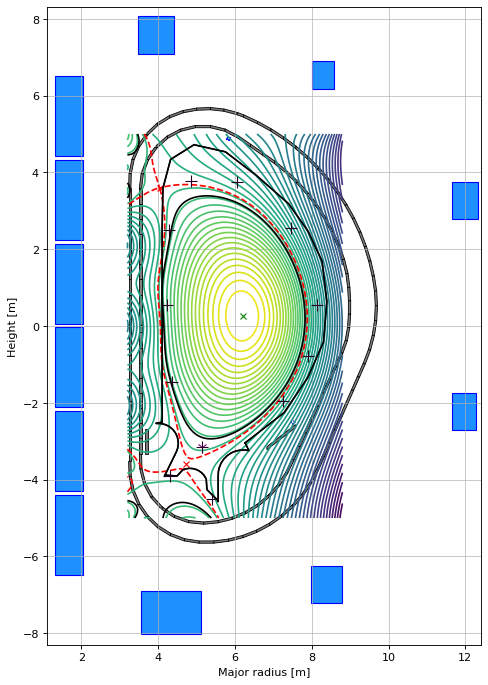

In [9]:
GSStaticSolver.inverse_solve(eq=eq, 
                     profiles=profiles, 
                     constrain=constrain, 
                     target_relative_tolerance=1e-5,
                     target_relative_psit_update=1e-3,
                     max_iter_per_update=10,
                     max_rel_update_size=0.075,
                     damping_factor=.99,
                     max_rel_psit=.05,
                     verbose=True, # print output
                     l2_reg=1e-14,
                     )

fig1, ax1 = plt.subplots(1, 1, figsize=(7, 15), dpi=80)

ax1.grid(zorder=0, alpha=0.75)
ax1.set_aspect('equal')
eq.tokamak.plot(axis=ax1,show=False)                                                          # plots the active coils and passive structures
ax1.fill(tokamak.wall.R, tokamak.wall.Z, color='k', linewidth=1.2, facecolor='w', zorder=0)   # plots the limiter
eq.plot(axis=ax1,show=False)                                                                  # plots the equilibrium
constrain.plot(axis=ax1, show=False)                                                          # plots the contraints
ax1.set_xlim(1.1, 12.4)
ax1.set_ylim(-8.3, 8.3)


In [11]:
eq.tokamak.getCurrents()

# # save coil currents to file
# import pickle
# with open('simple_diverted_currents_PaxisIp.pk', 'wb') as f:
#     pickle.dump(obj=inverse_current_values, file=f)

{'CS1': 254522594.4022803,
 'CS2': 256630672.12296775,
 'CS3': 349230271.2700164,
 'VS3': 0.0,
 'PF1': 77595559.74052326,
 'PF2': 10848872.838529486,
 'PF3': -452152.91438702936,
 'PF4': 1354134.1088954685,
 'PF5': 7011669.368096862,
 'PF6': 74252044.01817128,
 'I1_0': 0.0,
 'I2_0': 0.0,
 'I3_0': 0.0,
 'I4_0': 0.0,
 'I5_0': 0.0,
 'I6_0': 0.0,
 'I7_0': 0.0,
 'I8_0': 0.0,
 'I9_0': 0.0,
 'I10_0': 0.0,
 'I11_0': 0.0,
 'I12_0': 0.0,
 'I13_0': 0.0,
 'I14_0': 0.0,
 'I15_0': 0.0,
 'I16_0': 0.0,
 'I17_0': 0.0,
 'I18_0': 0.0,
 'I19_0': 0.0,
 'I20_0': 0.0,
 'I21_0': 0.0,
 'I22_0': 0.0,
 'I23_0': 0.0,
 'I24_0': 0.0,
 'I25_0': 0.0,
 'I26_0': 0.0,
 'I27_0': 0.0,
 'I28_0': 0.0,
 'I29_0': 0.0,
 'I30_0': 0.0,
 'I31_0': 0.0,
 'I32_0': 0.0,
 'I33_0': 0.0,
 'I34_0': 0.0,
 'I35_0': 0.0,
 'I36_0': 0.0,
 'I37_0': 0.0,
 'I38_0': 0.0,
 'I39_0': 0.0,
 'I40_0': 0.0,
 'I41_0': 0.0,
 'I42_0': 0.0,
 'I43_0': 0.0,
 'I44_0': 0.0,
 'I45_0': 0.0,
 'I46_0': 0.0,
 'I47_0': 0.0,
 'I48_0': 0.0,
 'I49_0': 0.0,
 'I50_0': 0.0